In [18]:
import pandas  as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [19]:
data = pd.read_csv("Advertising.csv")
data.shape

(200, 5)

In [20]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
# avoiding redundent data
data = data.iloc[:,1:]
data.columns = [i.lower() for i in data.columns]
data.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


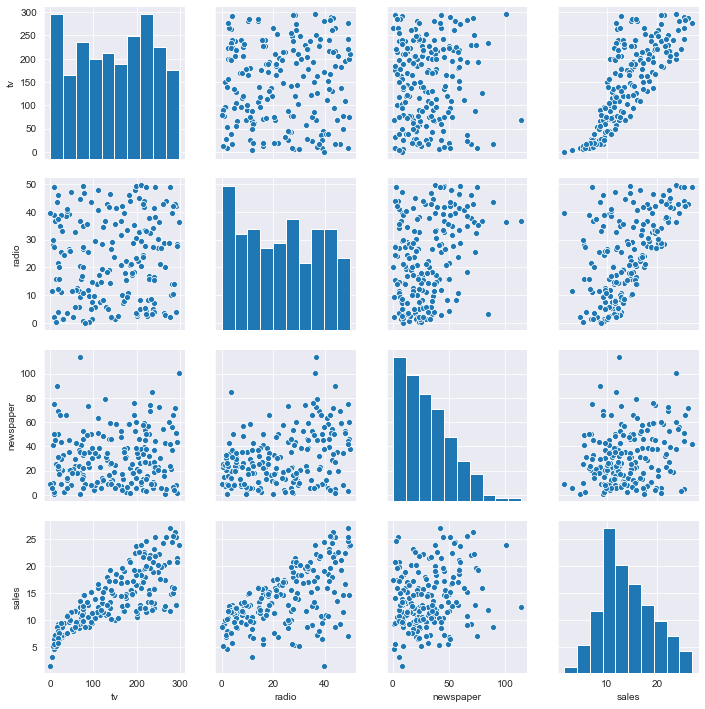

In [22]:
# see "sales"  relationship with every other column 
# insight : feature's tv and radio are correlated with sales.
sns.pairplot(data)

Text(29.0, 0.5, 'Sales ')

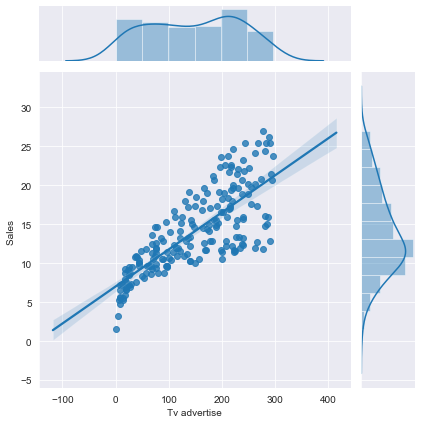

In [23]:
sns.jointplot(data["tv"],data["sales"],kind = 'reg')
plt.xlabel("Tv advertise")
plt.ylabel("Sales ")

Text(29.0, 0.5, 'Sales ')

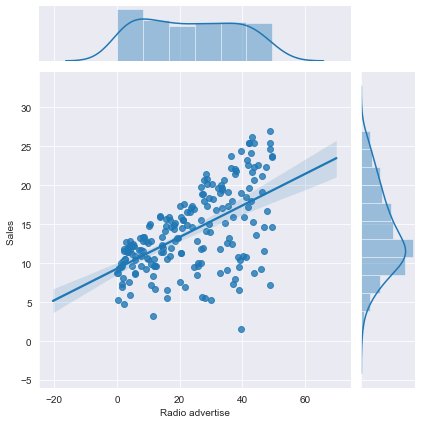

In [24]:
sns.jointplot(data["radio"],data["sales"],kind = 'reg')
plt.xlabel("Radio advertise")
plt.ylabel("Sales ")

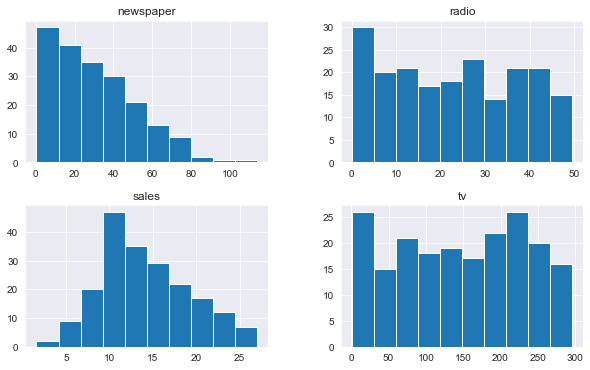

In [25]:
plt.rcParams['figure.figsize'] = (10,6)
data.hist()
plt.show()

Text(0.5, 0, "Sale's")

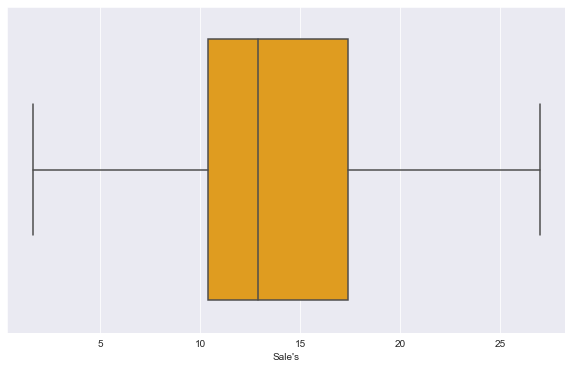

In [26]:
# checking for outlier
sns.boxplot(data["sales"],color = 'orange')
plt.xlabel("Sale's")

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
x = data.drop("sales",axis =1)
y = data["sales"]
print("Feature data shape :",x.shape)
print("Target shape       :",y.shape)

Feature data shape : (200, 3)
Target shape       : (200,)


In [29]:
sc = StandardScaler()
x  = sc.fit_transform(x)

In [30]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
def Adjusted_rsquare(info,r2_score_val):
    n = info.shape[0]
    p = info.shape[1]
    return 1-(((1-r2_score_val)*(n-1))/(n-p-1))

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .3,random_state = 0)

In [33]:
# Linear Regression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred   = lr.predict(xtest)
print("Model score on Test Data :")
print("Ridge reg rsquare value :",r2_score(ytest,ypred))
r2_score_val = r2_score(ytest,ypred)
print("Ridge reg Adjusted_rsquare value :",Adjusted_rsquare(xtest,r2_score_val))
print("MSE for Ridge Reg is :",mean_squared_error(ytest,ypred))

Model score on Test Data :
Ridge reg rsquare value : 0.8649018906637793
Ridge reg Adjusted_rsquare value : 0.8576644919493389
MSE for Ridge Reg is : 3.6913948456986048


# Ridge Regression

In [34]:
ridgecv = RidgeCV(cv =10,normalize = True)
ridgecv.fit(xtrain,ytrain)
ridgealpha = ridgecv.alpha_
ridgealpha

0.1

In [35]:
ridge = Ridge(ridgealpha)
ridge.fit(xtrain,ytrain)
ypred = ridge.predict(xtest)
print("Model score on Test Data :")
print("Ridge reg rsquare value :",r2_score(ytest,ypred))
r2_score_val = r2_score(ytest,ypred)
print("Ridge reg Adjusted_rsquare value :",Adjusted_rsquare(xtest,r2_score_val))
print("MSE for Ridge Reg is :",mean_squared_error(ytest,ypred))

Model score on Test Data :
Ridge reg rsquare value : 0.8648691854285483
Ridge reg Adjusted_rsquare value : 0.8576300346479349
MSE for Ridge Reg is : 3.692288477277553


# Lasso Regression

In [36]:
Lassocv = LassoCV(cv = 10,normalize = True)
Lassocv.fit(xtrain,ytrain)
Lassocv_alpha = Lassocv.alpha_
Lassocv_alpha

0.004937918682526973

In [37]:
# Lasso Regression
Lasso = Lasso(Lassocv_alpha)
Lasso.fit(xtrain,ytrain)
ypred = Lasso.predict(xtest)
print("Model score on Test Data :")
print("Lasso reg rsquare value :",r2_score(ytest,ypred))
r2_score_val = r2_score(ytest,ypred)
print("Lasso reg Adjusted_rsquare value :",Adjusted_rsquare(xtest,r2_score_val))
print("MSE for Lasso Reg is :",mean_squared_error(ytest,ypred))

Model score on Test Data :
Lasso reg rsquare value : 0.865002259556945
Lasso reg Adjusted_rsquare value : 0.8577702377474956
MSE for Lasso Reg is : 3.6886523852991164


# ElasticNet Regression

In [38]:
elcv =ElasticNetCV(normalize = True)
elcv.fit(xtrain,ytrain)
elcv_alpha = elcv.alpha_
elcv_alpha

0.0006497641523783639

In [39]:
# ElasticNet Regression
ElasticNet = ElasticNet(elcv_alpha)
ElasticNet.fit(xtrain,ytrain)
ypred = ElasticNet.predict(xtest)
ytrain_pred = lr.predict(xtrain)
print("Model score on Test Data :")
print("ElasticNet reg rsquare value :",r2_score(ytest,ypred))
r2_score_val = r2_score(ytest,ypred)
print("ElasticNet reg Adjusted_rsquare value :",Adjusted_rsquare(xtest,r2_score_val))
print("MSE for ElasticNet Reg is :",mean_squared_error(ytest,ypred))

Model score on Test Data :
ElasticNet reg rsquare value : 0.8648936583277635
ElasticNet reg Adjusted_rsquare value : 0.8576558185953223
MSE for ElasticNet Reg is : 3.6916197844700345
